In [4]:
import pandas as pd

df= pd.read_csv("./dataset_copy.csv", encoding="Windows-1252")

print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

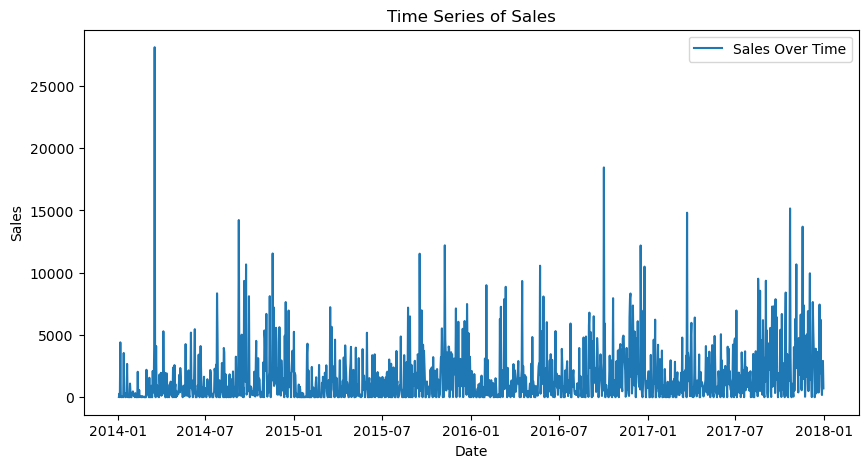

ADF Statistic: -4.939878803531317
p-value: 2.9148790727673388e-05
Critical Values: {'1%': -3.434908816804013, '5%': -2.863553406963303, '10%': -2.5678419239852994}
The data is stationary.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load dataset
df = pd.read_csv("./dataset_copy.csv", encoding="windows-1252", parse_dates=["Order Date"], index_col="Order Date")

# Aggregate Sales by Date to create a time series
time_series = df["Sales"].resample('D').sum()

# Plot the time series
plt.figure(figsize=(10,5))
plt.plot(time_series, label="Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Time Series of Sales")
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller (ADF) Test
result = adfuller(time_series.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Check p-value
if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load dataset
df = pd.read_csv("./dataset_copy.csv", encoding="windows-1252", parse_dates=["Order Date"], index_col="Order Date")

# Aggregate Sales by Date to create a time series
monthly_sales = df["Sales"].resample('M').sum()

/var/folders/vz/ypvzclms57j1j_xzx93y_t6m0000gn/T/ipykernel_2145/4135045709.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df["Sales"].resample('M').sum()


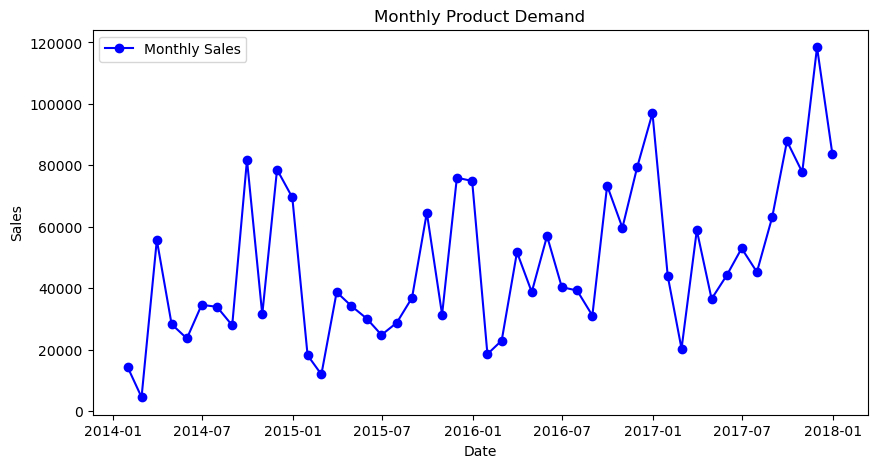

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Order Date', freq='ME')
(48,)


In [16]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, marker='o', linestyle='-', color='b', label="Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Product Demand")
plt.legend()
plt.show()

print(monthly_sales.index)  # Check if months are continuous
print(monthly_sales.shape)  # Number of months in dataset


/var/folders/vz/ypvzclms57j1j_xzx93y_t6m0000gn/T/ipykernel_2145/295461760.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df["Sales"].resample('M').sum()


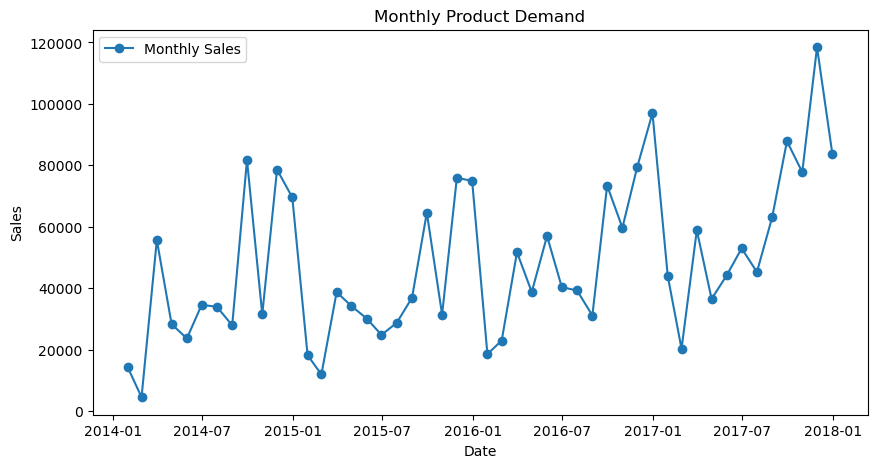

ADF Statistic: -4.493767844002667
p-value: 0.000201801984582376
Critical Values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}
The data is stationary.
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   38
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -425.225
Date:                Wed, 02 Apr 2025   AIC                            860.449
Time:                        11:06:39   BIC                            868.504
Sample:                    01-31-2014   HQIC                           863.289
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2201  

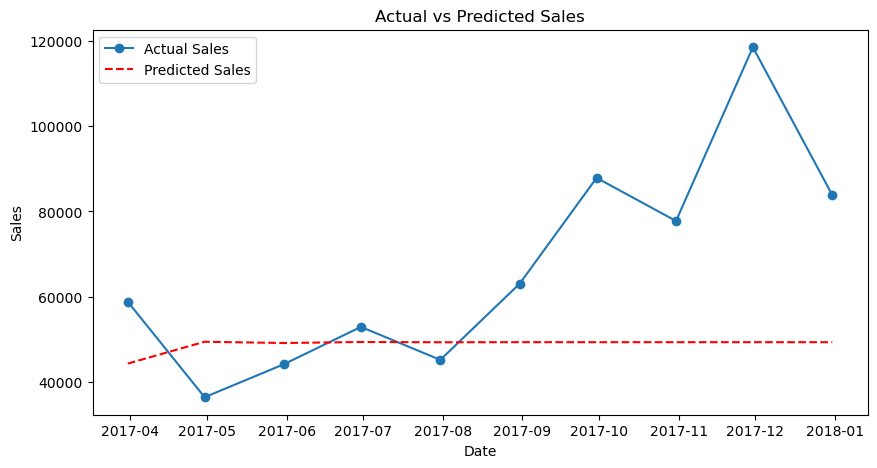

Future 12-Month Sales Forecast:
2017-03-31    44395.800998
2017-04-30    49507.422832
2017-05-31    49209.260050
2017-06-30    49450.358290
2017-07-31    49387.049612
2017-08-31    49409.261980
2017-09-30    49402.199140
2017-10-31    49404.516376
2017-11-30    49403.763834
2017-12-31    49404.009036
2018-01-31    49403.929227
2018-02-28    49403.955212
Freq: ME, Name: predicted_mean, dtype: float64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Load the dataset and parse dates
df = pd.read_csv("./dataset_copy.csv",encoding="Windows-1252" , parse_dates=["Order Date"], index_col="Order Date")

# Step 2: Aggregate sales data by month
monthly_sales = df["Sales"].resample('M').sum()

# Step 3: Visualize the sales data
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label="Monthly Sales", marker='o')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Product Demand")
plt.legend()
plt.show()

# Step 4: Check if data is stationary using ADF test
adf_test = adfuller(monthly_sales.dropna())
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])
if adf_test[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary, differencing is needed.")
    monthly_sales = monthly_sales.diff().dropna()  # First-order differencing

# Step 5: Split data into train and test sets
train_size = int(len(monthly_sales) * 0.8)  # 80% training, 20% testing
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Step 6: Fit ARIMA Model (p, d, q)
model = ARIMA(train, order=(2, 1, 2))  # (p=2, d=1, q=2) - tune these parameters
model_fit = model.fit()
print(model_fit.summary())  # Display model summary

# Step 7: Forecast for test period
forecast = model_fit.forecast(steps=len(test))

# Step 8: Evaluate Model Performance
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 9: Plot actual vs predicted sales
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label="Actual Sales", marker='o')
plt.plot(test.index, forecast, label="Predicted Sales", linestyle='dashed', color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

# Step 10: Forecast future product demand (next 12 months)
future_forecast = model_fit.forecast(steps=12)
print("Future 12-Month Sales Forecast:")
print(future_forecast)


In [19]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


/var/folders/vz/ypvzclms57j1j_xzx93y_t6m0000gn/T/ipykernel_2145/3436240026.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df["Sales"].resample('M').sum()
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be remove

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1079.882, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1098.402, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1077.114, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1078.127, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1096.548, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1091.142, Time=0.00 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.911, Time=0.03 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1079.082, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1081.816, Time=0.01 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1080.489, Time=0.09 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.759, Time=0.01 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.411, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.909, Time=0.00 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.137, Time=0.04 sec
 ARIMA(2,1,0)(1,0,1

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/

 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=1075.825, Time=0.02 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1076.073, Time=0.03 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1076.750, Time=0.02 sec
 ARIMA(3,1,1)(1,0,0)[12] intercept   : AIC=1078.044, Time=0.04 sec
 ARIMA(2,1,0)(1,0,0)[12]             : AIC=1071.693, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=1086.833, Time=0.00 sec
 ARIMA(2,1,0)(2,0,0)[12]             : AIC=1073.261, Time=0.04 sec
 ARIMA(2,1,0)(1,0,1)[12]             : AIC=1073.312, Time=0.02 sec
 ARIMA(2,1,0)(0,0,1)[12]             : AIC=1077.228, Time=0.01 sec


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/

 ARIMA(2,1,0)(2,0,1)[12]             : AIC=1075.190, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=1075.176, Time=0.01 sec
 ARIMA(3,1,0)(1,0,0)[12]             : AIC=1074.080, Time=0.02 sec
 ARIMA(2,1,1)(1,0,0)[12]             : AIC=1074.498, Time=0.02 sec
 ARIMA(1,1,1)(1,0,0)[12]             : AIC=1073.398, Time=0.02 sec
 ARIMA(3,1,1)(1,0,0)[12]             : AIC=1075.031, Time=0.05 sec

Best model:  ARIMA(2,1,0)(1,0,0)[12]          
Total fit time: 0.848 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -531.846
Date:                            Wed, 02 Apr 2025   AIC                           1071.693
Time:                                    11:17:35   BIC                           1079.093
Sample:                                01-31-2014   HQIC         

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


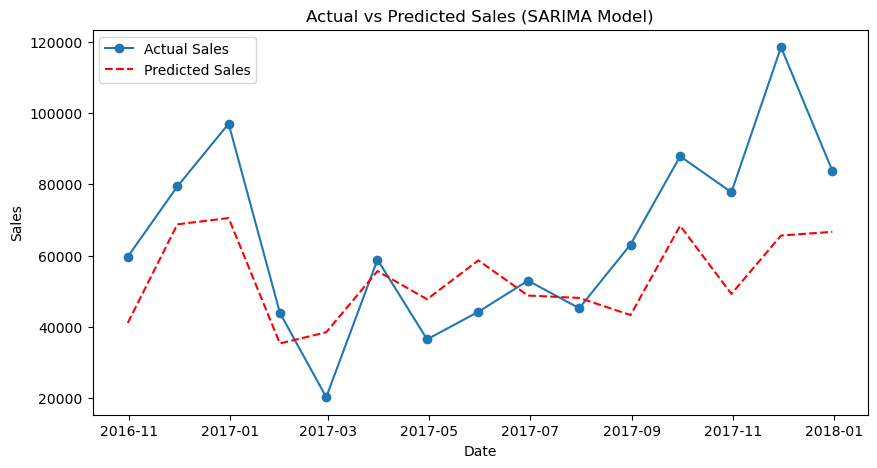

Future 12-Month Sales Forecast:
2016-10-31    41134.014917
2016-11-30    68787.978548
2016-12-31    70542.365817
2017-01-31    35388.173504
2017-02-28    38506.664054
2017-03-31    55663.892989
2017-04-30    47777.136173
2017-05-31    58668.963967
2017-06-30    48809.591466
2017-07-31    48148.200183
2017-08-31    43338.090323
2017-09-30    68378.283126
2017-10-31    49265.644808
2017-11-30    65641.752477
2017-12-31    66679.882429
Freq: ME, Name: predicted_mean, dtype: float64


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Load the dataset and parse dates
df = pd.read_csv("./dataset_copy.csv", encoding="Windows-1252" , parse_dates=["Order Date"], index_col="Order Date")

# Step 2: Aggregate sales data by month
monthly_sales = df["Sales"].resample('M').sum()

# Step 3: Visualize the sales data
# plt.figure(figsize=(10,5))
# plt.plot(monthly_sales, label="Monthly Sales", marker='o')
# plt.xlabel("Date")
# plt.ylabel("Sales")
# plt.title("Monthly Product Demand")
# plt.legend()
# plt.show()

# Step 4: Find the best ARIMA/SARIMA parameters using Auto ARIMA
best_model = auto_arima(monthly_sales, seasonal=True, m=12, stepwise=True, trace=True)
print(best_model.summary())

# Extract optimal (p, d, q) and (P, D, Q, s) parameters
order = best_model.order
seasonal_order = best_model.seasonal_order

# Step 5: Split data into train and test sets
train_size = int(len(monthly_sales) * 0.7)  # 70% training, 30% testing
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Step 6: Fit SARIMA Model with optimized parameters
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()
print(model_fit.summary())  # Display model summary

# Step 7: Forecast for test period
forecast = model_fit.forecast(steps=len(test))

# Step 8: Evaluate Model Performance
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 9: Plot actual vs predicted sales
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label="Actual Sales", marker='o')
plt.plot(test.index, forecast, label="Predicted Sales", linestyle='dashed', color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales (SARIMA Model)")
plt.legend()
plt.show()

# Step 10: Forecast future product demand (next 12 months)
future_forecast = model_fit.forecast(steps=15)
print("Future 12-Month Sales Forecast:")
print(future_forecast)


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

def generate_synthetic_logistics_data(
    start_date='2021-01-01',
    end_date='2023-01-01',
    regions=['North', 'South', 'East', 'West'],
    product_categories=['Electronics', 'Clothing', 'Food', 'Furniture'],
    num_products=20
):
    """
    Generate synthetic logistics demand data with realistic patterns
    """
    # Create date range
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Create product list
    products = [f"Product_{i}" for i in range(1, num_products + 1)]
    
    # Prepare empty list for data
    data = []
    
    # Base demand for each product (some products are more popular)
    base_demands = {p: np.random.randint(10, 100) for p in products}
    
    # Regional factors (some regions have higher demand)
    regional_factors = {
        'North': 1.2,
        'South': 0.9,
        'East': 1.0,
        'West': 1.1
    }
    
    # Category seasonality patterns
    category_seasonality = {
        'Electronics': lambda month: 1.0 + 0.5 * (month in [11, 12]),  # Higher in Nov-Dec
        'Clothing': lambda month: 1.0 + 0.3 * (month in [3, 4, 9, 10]),  # Higher in spring/fall
        'Food': lambda month: 1.0 + 0.1 * (month in [11, 12]),  # Slightly higher in holidays
        'Furniture': lambda month: 1.0 + 0.2 * (month in [1, 7])  # Higher in January and July
    }
    
    # Assign products to categories
    product_category = {}
    for p in products:
        product_category[p] = random.choice(product_categories)
    
    # Generate data
    for date in date_range:
        # Day of week effect (weekends lower for B2B logistics)
        dow_factor = 0.7 if date.dayofweek >= 5 else 1.0
        
        # Monthly seasonality
        month = date.month
        
        # Yearly trend (gradual growth)
        yearly_factor = 1.0 + 0.15 * ((date - pd.Timestamp(start_date)).days / 365)
        
        # Special events/holidays
        is_holiday = (
            (date.month == 12 and date.day >= 20 and date.day <= 26) or  # Christmas
            (date.month == 11 and date.day >= 20 and date.day <= 30) or  # Black Friday period
            (date.month == 1 and date.day <= 5)  # New Year
        )
        holiday_factor = 1.5 if is_holiday else 1.0
        
        # Economic cycle (simplified)
        days_since_start = (date - pd.Timestamp(start_date)).days
        economic_cycle = 1.0 + 0.1 * np.sin(days_since_start / 180 * np.pi)
        
        # Generate orders for each product in each region
        for region in regions:
            for product in products:
                category = product_category[product]
                
                # Calculate demand factors
                base_demand = base_demands[product]
                region_factor = regional_factors.get(region, 1.0)
                season_factor = category_seasonality[category](month)
                
                # Add randomness
                randomness = np.random.normal(1.0, 0.2)
                
                # Calculate final demand
                demand = int(base_demand * 
                           dow_factor * 
                           region_factor * 
                           season_factor * 
                           yearly_factor * 
                           holiday_factor * 
                           economic_cycle * 
                           randomness)
                
                # Ensure demand is at least 0
                demand = max(0, demand)
                
                # Add record
                data.append({
                    'date': date,
                    'region': region,
                    'product': product,
                    'category': category,
                    'demand': demand
                })
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Add some external factors
    df['temperature'] = df.apply(
        lambda x: 60 + 30 * np.sin((x['date'].dayofyear / 365) * 2 * np.pi) + np.random.normal(0, 5)
        if x['region'] in ['North', 'South'] 
        else 70 + 15 * np.sin((x['date'].dayofyear / 365) * 2 * np.pi) + np.random.normal(0, 5),
        axis=1
    )
    
    df['fuel_price'] = [
        3.0 + 0.5 * np.sin(i/180) + 0.01 * (i/100) + np.random.normal(0, 0.1)
        for i in range(len(df))
    ]
    
    df['marketing_spend'] = df.apply(
        lambda x: np.random.randint(1000, 3000) * 1.5 if x['date'].month in [11, 12] else np.random.randint(1000, 3000),
        axis=1
    )
    
    return df

# Example usage
df = generate_synthetic_logistics_data()
print(f"Generated {len(df)} records of synthetic logistics data")
print(df.head())

# Save to CSV
df.to_csv('synthetic_logistics_data.csv', index=False)
print("Data saved to synthetic_logistics_data.csv")

# Generate a smaller test dataset with similar patterns but future dates
test_df = generate_synthetic_logistics_data(
    start_date='2023-01-01', 
    end_date='2023-03-01'
)
test_df.to_csv('synthetic_test_data.csv', index=False)
print("Test data saved to synthetic_test_data.csv")

Generated 58480 records of synthetic logistics data
        date region    product     category  demand  temperature  fuel_price  \
0 2021-01-01  North  Product_1     Clothing     131    56.316911    2.929629   
1 2021-01-01  North  Product_2  Electronics      58    63.961024    2.934005   
2 2021-01-01  North  Product_3  Electronics      85    56.557502    3.098139   
3 2021-01-01  North  Product_4         Food      47    62.777294    3.031286   
4 2021-01-01  North  Product_5         Food     113    66.947427    2.986884   

   marketing_spend  
0           2582.0  
1           2037.0  
2           1778.0  
3           2258.0  
4           1603.0  
Data saved to synthetic_logistics_data.csv
Test data saved to synthetic_test_data.csv
